In [2]:
import logging
from operator import sub
import networkx as nx
import matplotlib.pyplot as plt
import spacy
import imageio

nlp = spacy.load("en_core_web_sm")

In [3]:
# Read large graph
G = nx.read_edgelist("../graphs/full-dictionary.edgelist")

In [4]:
pos = nx.random_layout(G)

In [5]:
########## Settings ##########
threshold = 0.1

In [6]:
def stimulate(key, value, G, visited=[]):
    value = float(value)
    if (value < 0.01):
        return

    print(f'Stimulating {key} with {value}')
    if key not in visited:
        visited.append(key)
        node = G[key]
        previous_value = G.nodes(data=True)[key]['s']
        nx.set_node_attributes(G, {key: {'s':  previous_value + value}})
        for sub_key in node.keys():
            weight = node[sub_key]['weight']
            stimulate(sub_key, weight * value, G, visited)

    return visited



In [7]:
def get_subgraph(G, pos):
    nodes = (
        node
        for node, data
        in G.nodes(data=True)
        if data.get("s") > threshold
    )

    subgraph = G.subgraph(nodes)

    print(subgraph)

    stimulus = nx.get_node_attributes(subgraph, 's')

    node_alpha = []

    for n, v in stimulus.items():
        node_alpha.append(v)

    nx.draw_networkx_nodes(
        subgraph, pos=pos, node_size=100, alpha=node_alpha)
    nx.draw_networkx_labels(subgraph, pos, font_size=6)
    nx.draw_networkx_edges(subgraph, pos)
    
    # plt.savefig('output/graph.jpg')
    plt.plot()

    return subgraph

Stimulating pet with 1.0
Stimulating etym with 0.1
Stimulating a with 0.011000000000000001
Stimulating capital with 0.011000000000000001
Stimulating symbol with 0.010000000000000002
Stimulating staff with 0.010000000000000002
Stimulating aam with 0.013000000000000001
Stimulating abanga with 0.010000000000000002
Stimulating abasia with 0.010000000000000002
Stimulating abater with 0.010000000000000002
Stimulating abawed with 0.010000000000000002
Stimulating abietic with 0.010000000000000002
Stimulating ability with 0.010000000000000002
Stimulating abler with 0.010000000000000002
Stimulating aboma with 0.010000000000000002
Stimulating abrahamic with 0.010000000000000002
Stimulating abrasive with 0.010000000000000002
Stimulating absinthate with 0.010000000000000002
Stimulating absquatulate with 0.010000000000000002
Stimulating abuzz with 0.010000000000000002
Stimulating acalephoid with 0.010000000000000002
Stimulating acanthus with 0.010000000000000002
Stimulating acauline with 0.010000000

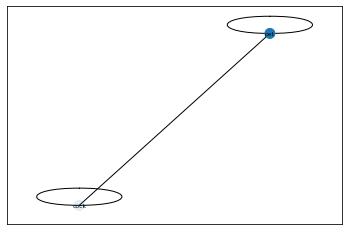

In [8]:
nx.set_node_attributes(G, 0, name='s')
stimulate('pet', 1, G)
subgraph = get_subgraph(G, pos)

In [11]:
subgraph.edges(data=True)

AttributeError: 'NoneType' object has no attribute 'edges'